In [1]:
import cv2
#Libreria Numpy
import numpy as np
#Libreria de opciones de sistema
import os
#Dar importancia de mensajes
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import shutil
import glob
#Importar pandas
import pandas as pd
#Importar librerias graficas
import matplotlib.pyplot as plt
from  PIL  import Image
#Importar librerias de analisis
import seaborn as sn
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from rembg import remove
from sklearn.preprocessing import MinMaxScaler
import h5py
#Importar libreria de tiempo
from time import sleep
#Importo libreria para divirvir el set
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA
print("Loaded all libraries")

Loaded all libraries


In [7]:
#Ruta de origen de .ipynb
root_path = os.path.abspath('.')
print(root_path)
#Obtener ruta de carpeta con imagenes
images_path =root_path+"/PROYECTOIA_U3"
#Enlistar carpetas de imagenes
class_names = os.listdir(images_path)
#Clasificar carpetas
class_names.sort()

c:\Users\VINICIO BORJA\Desktop\IA\Unidad3\Borja_Lab1\ProyectoVinicioMajo


In [8]:
#copiar las bananas
#Ruta de imagnes aumentadas
banana_path= root_path+"/Clases_Dataset_Augmented"
#Iteracion por cada clase
for class_name in class_names:
    #Formacion de ruta de clase
    cur_path = images_path + "/" + class_name
    #Creacion de ruta de lementos
    elements = os.listdir(cur_path)
    #Creacion de ruta de archivos aumentados
    os.makedirs(banana_path+"/"+ class_name, exist_ok=True)
    
    for element in elements:
        print("Copying Image - {} in Clases_Dataset_Augmented/{}".format(element, class_name))
        src = os.path.join(images_path + "/" + class_name, element) # origen
        dst = os.path.join(banana_path+"/" + class_name, element) 
        shutil.copy(src, dst)

Copying Image - L00376418_1.jpg in Clases_Dataset_Augmented/ArielChabla
Copying Image - L00376418_2.jpg in Clases_Dataset_Augmented/ArielChabla
Copying Image - L00376418_3.jpg in Clases_Dataset_Augmented/ArielChabla
Copying Image - L00376418_4.jpg in Clases_Dataset_Augmented/ArielChabla
Copying Image - L00376418_5.jpg in Clases_Dataset_Augmented/ArielChabla
Copying Image - L00376418_6.jpg in Clases_Dataset_Augmented/ArielChabla
Copying Image - L00376418_7.jpg in Clases_Dataset_Augmented/ArielChabla
Copying Image - L00376418_8.jpg in Clases_Dataset_Augmented/ArielChabla
Copying Image - L00385770_1.png in Clases_Dataset_Augmented/ArroboMercy
Copying Image - L00385770_2.png in Clases_Dataset_Augmented/ArroboMercy
Copying Image - L00385770_3.png in Clases_Dataset_Augmented/ArroboMercy
Copying Image - L00385770_4.png in Clases_Dataset_Augmented/ArroboMercy
Copying Image - L00385770_5.png in Clases_Dataset_Augmented/ArroboMercy
Copying Image - L00385770_6.png in Clases_Dataset_Augmented/Arro

## Aumento de Datos

In [10]:
#Crear generador de datos de imagen
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

## Clases 

In [11]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/ArielChabla")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'ArielChabla', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [12]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/ArroboMercy")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'ArroboMercy', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [13]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/BarraganSteven")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'BarraganSteven', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [14]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/CevallosJoan")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'CevallosJoan', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [15]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/EnriquezSelena")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'EnriquezSelena', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [16]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/GenesisHeredia")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'GenesisHeredia', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [17]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/GoyesAnthony")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'GoyesAnthony', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [18]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/HectorCedeno")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'HectorCedeno', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [19]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/JhonZambrano")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'JhonZambrano', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [20]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/JordanEspinosa")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'JordanEspinosa', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [21]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/JorgeBorrero")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'JorgeBorrero', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [22]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/JoseRuiz")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'JoseRuiz', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [23]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/LucioCarlos")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'LucioCarlos', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [24]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/MasacheFernando")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'MasacheFernando', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [25]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/MelanyLopez")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'MelanyLopez', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [26]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/MosqueraLucy")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'MosqueraLucy', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [27]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/NatalyAcosta")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'NatalyAcosta', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [28]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/OlallaLuis")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'OlallaLuis', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [29]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/ParragaMariaJose")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'ParragaMariaJose', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [30]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/PauteKevin")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'PauteKevin', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [31]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/PauteKevin")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'PauteKevin', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [32]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/RaymondDavila")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'RaymondDavila', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

In [33]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/RivasSelena")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'RivasSelena', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break

In [34]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/SalazarJohana")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'SalazarJohana', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break

In [35]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/SolanoWilmer")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'SolanoWilmer', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break

In [36]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/SolorzanoBryan")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'SolorzanoBryan', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break

In [37]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/VinicioBorja")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'VinicioBorja', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break

## Filtro NLM para eliminación de ruido de imágenes

In [38]:
os.chdir(root_path)
images_path = root_path+"/Clases_Dataset_Augmented/"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['ArielChabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'JhonZambrano', 'JordanEspinosa', 'JorgeBorrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'NatalyAcosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'RaymondDavila', 'RivasSelena', 'SalazarJohana', 'SolanoWilmer', 'SolorzanoBryan', 'VinicioBorja']


In [39]:
#Lectura de cada clase de imagen
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    # Carpeta de modificados
    file_path = root_path+"/Class_Dataset_Denoised/"+ cur_label
    #Creacion de rcarpeta para archivos modificaos
    os.makedirs(file_path, exist_ok=True)
    i = 1
    #Procesamiento de cada imeagen
    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # lectura de ruta de imagen
        image = cv2.imread(file)
        # imagen filtrada
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
        # guardar imagen
        save_path = file_path
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        # conteo de procesos
        i += 1

Processing Image - 1 in ArielChabla
Processing Image - 2 in ArielChabla
Processing Image - 3 in ArielChabla
Processing Image - 4 in ArielChabla
Processing Image - 5 in ArielChabla
Processing Image - 6 in ArielChabla
Processing Image - 7 in ArielChabla
Processing Image - 8 in ArielChabla
Processing Image - 9 in ArielChabla
Processing Image - 10 in ArielChabla
Processing Image - 11 in ArielChabla
Processing Image - 12 in ArielChabla
Processing Image - 13 in ArielChabla
Processing Image - 14 in ArielChabla
Processing Image - 15 in ArielChabla
Processing Image - 16 in ArielChabla
Processing Image - 17 in ArielChabla
Processing Image - 18 in ArielChabla
Processing Image - 19 in ArielChabla
Processing Image - 20 in ArielChabla
Processing Image - 21 in ArielChabla
Processing Image - 22 in ArielChabla
Processing Image - 23 in ArielChabla
Processing Image - 24 in ArielChabla
Processing Image - 25 in ArielChabla
Processing Image - 26 in ArielChabla
Processing Image - 27 in ArielChabla
Processing

## Eliminacion de Fondo

In [40]:
#Ruta de imagenes filtradas
images_path = root_path+"/Class_Dataset_Denoised/"
#BUsqueda de clases
class_names = os.listdir(images_path)
class_names.sort()
#Impresion de clases

In [41]:
#Iteracion en cada clase
for class_name in class_names:
    #Ruta de clase
    cur_path = images_path + "/" + class_name
    #Nombre de calse
    cur_label = class_name
    # Carpeta de modificados
    file_path = root_path+"/Class_Dataset_RemovedBG/"+ cur_label
    #Creacion de rcarpeta para archivos modificaos
    os.makedirs(file_path, exist_ok=True)
    i = 1
    #Procesamiento de cada imagen
    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # Lectura de imagen
        image = cv2.imread(file)
        # remocion de fondo
        output = remove(image)
        # GUardado de imagen
        save_path = file_path
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        # Conteo de proceso
        i += 1

Processing Image - 1 in ArielChabla
Processing Image - 2 in ArielChabla
Processing Image - 3 in ArielChabla
Processing Image - 4 in ArielChabla
Processing Image - 5 in ArielChabla
Processing Image - 6 in ArielChabla
Processing Image - 7 in ArielChabla
Processing Image - 8 in ArielChabla
Processing Image - 9 in ArielChabla
Processing Image - 10 in ArielChabla
Processing Image - 11 in ArielChabla
Processing Image - 12 in ArielChabla
Processing Image - 13 in ArielChabla
Processing Image - 14 in ArielChabla
Processing Image - 15 in ArielChabla
Processing Image - 16 in ArielChabla
Processing Image - 17 in ArielChabla
Processing Image - 18 in ArielChabla
Processing Image - 19 in ArielChabla
Processing Image - 20 in ArielChabla
Processing Image - 21 in ArielChabla
Processing Image - 22 in ArielChabla
Processing Image - 23 in ArielChabla
Processing Image - 24 in ArielChabla
Processing Image - 25 in ArielChabla
Processing Image - 26 in ArielChabla
Processing Image - 27 in ArielChabla
Processing

## Carga de Datos y Exploracion

In [42]:
root_path = os.path.abspath('.')
print(root_path)
#Obtener ruta de carpeta con imagenes
fpath =root_path+"/Class_Dataset_RemovedBG"
#Permite Generar numeros aleatorios
random_seed = 42
#Obtengo las clases de las carpetas
categories = os.listdir(fpath)
#Defino un numero maximo de categorias
categories = categories[:25]
#Imprimo la lista de categorias y el numero
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

c:\Users\VINICIO BORJA\Desktop\IA\Unidad3\Borja_Lab1\ProyectoVinicioMajo
List of categories =  ['ArielChabla', 'ArroboMercy', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'JhonZambrano', 'JordanEspinosa', 'JorgeBorrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'NatalyAcosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'RaymondDavila', 'RivasSelena', 'SalazarJohana', 'SolanoWilmer', 'SolorzanoBryan', 'VinicioBorja'] 

No. of categories =  25


In [43]:
#Exploro las imagenes y las etiquetas de clase de cada una de las categorias
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_array = Image.fromarray(img, 'RGB')
            
            #REDIMENSIONO las imagenes ya que 227 es la con la dimension que usa AlexNet
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

#Indico el numero de imagenes cargadas y de igual forma la etiqueta que tiene

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  2160 
No. of labels loaded =  2160
<class 'list'> <class 'list'>


In [44]:
#Genero un arreglo tanto de las imagenes como de las etiquetas
images = np.array(images)
labels = np.array(labels)
#Imprimo el tamaño de las imagenes y de las etiquetas
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (2160, 227, 227, 3) 
Labels shape =  (2160,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


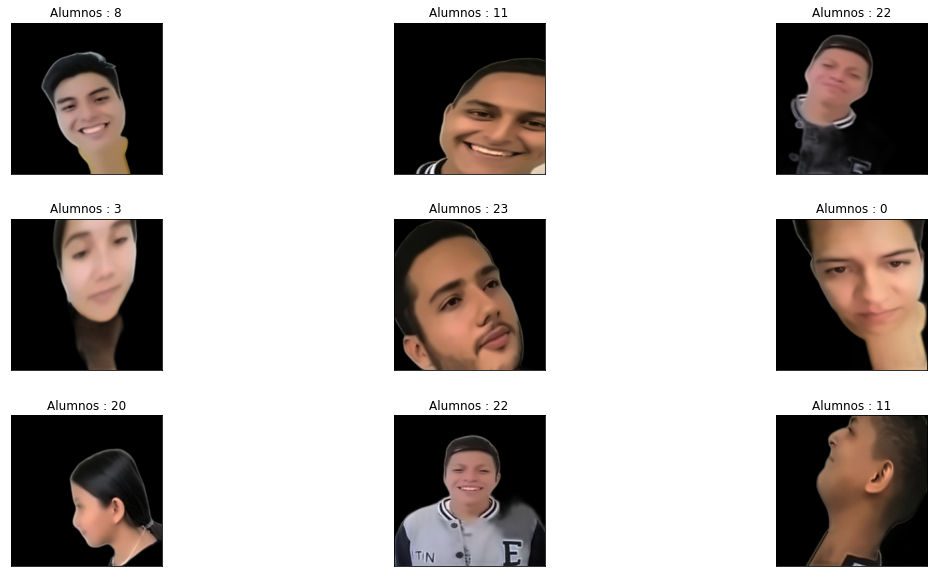

In [45]:
#Muestro magenes randomicas en las cuales se muestre tanto la imagen con la etiqueta que tiene
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Alumnos : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [46]:
#El paso n.º 1 en la reorganización de datos

#obtener números igualmente espaciados en un rango dado
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#mezclar todos los valores igualmente espaciados en la lista 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 2157 2158 2159]

'n' values after shuffling =  [2079  668 2073 ... 1130 1294  860]


## Preparo los datos para la CNN

In [47]:
#El paso n.º 2 en la reorganización de datos

#barajar las imágenes y los datos de las etiquetas correspondientes en ambas listas
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (2160, 227, 227, 3) 
Labels shape after shuffling =  (2160,)


In [48]:
#Se procede a hacer una normalizacion de las imagenes y de las etiquetas
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (2160, 227, 227, 3)


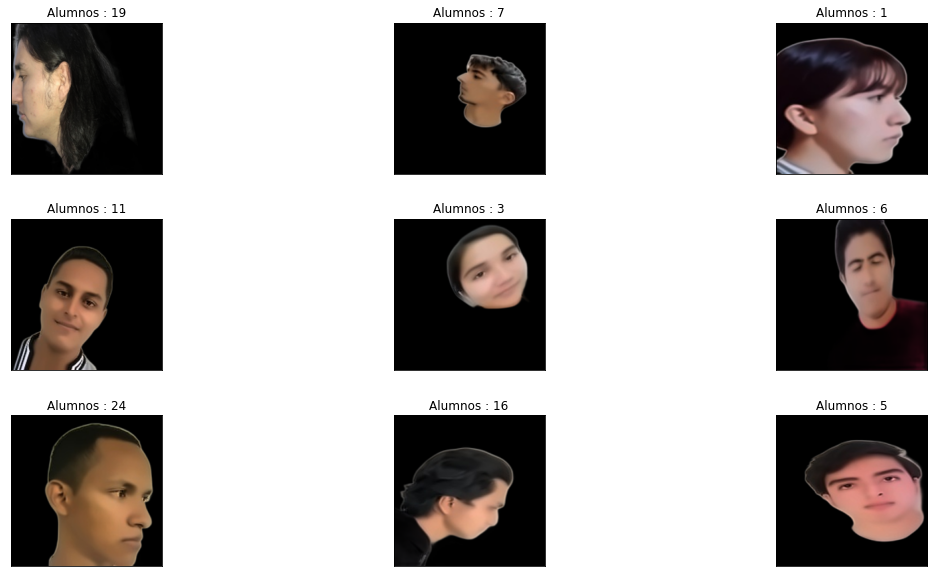

In [49]:
#Muestro imagenes random con sus etiquetas
display_rand_images(images, labels)

## Divido el Set de Entrenamiento y Prueba

In [50]:
#Divido mi set de datos en entrenamiento y prueba
train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

#Muestro la dimension de cada uno de los sets
print("train_ds shape = ",train_ds.shape)
print("train_labels shape = ",train_labels.shape)
print("\ntest_ds shape = ",test_ds.shape)
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (1728, 227, 227, 3)
train_labels shape =  (1728,)

test_ds shape =  (432, 227, 227, 3)
test_labels shape =  (432,)


In [12]:
train_ds.shape

(1484, 227, 227, 3)

In [13]:
test_ds.shape

(371, 227, 227, 3)

## Applying PCA

## Defino y entreno Modelo

In [51]:
#Diseño de la red convolucional de Alex Net en el cual se aprecia la arquitectura de AlexNet, mediante el uso de keras se puede generar
#capas de redes neuronales consecutivas
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),#Implementación de la primera capa de convolucion
    keras.layers.BatchNormalization(), #Capa de Normalizacion para mitigar los efectos del gradiente estandarizando y normalizando los valores de entrada
    keras.layers.MaxPool2D(pool_size=(2,2)), #Capa de MaxPooling con una ventana de 2x2
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),#Capa de Convolucion
    keras.layers.BatchNormalization(), #Capa de Normalizacion
    keras.layers.MaxPool2D(pool_size=(3,3)), #Capa de MaxPooling
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"), #Capa de Convolusion
    keras.layers.BatchNormalization(), #Capa de Normalizacion
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),#Capa de Convolucion
    keras.layers.BatchNormalization(), #Capa de Normalizacion
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"), #Capa de Convolucion
    keras.layers.BatchNormalization(), #Capa de Normalizacion
    keras.layers.MaxPool2D(pool_size=(2,2)), #Capa de Max Pooling
    keras.layers.Flatten(), #Convierto a matriz unidimensional
    keras.layers.Dense(1024,activation='relu'), #Capa densa con diferenteres neuronas
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'), #Capa densa
    keras.layers.Dropout(0.5),
    keras.layers.Dense(25,activation='softmax')  #Capa densa
])

In [52]:
#Implemento la compilacion del modelo con la funcion de perdida, el algoritmo de optimizacion e incluyo la metrica que usare
model.compile(
    loss='sparse_categorical_crossentropy',
    #optimizer=tf.optimizers.SGD(lr=0.001),
    optimizer='adam',
    metrics=['accuracy']    
)

In [53]:
"""Usando EarlyStopping para mayor acurrancy"""
#|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
#--------------------No entiendo muy bien como funciona el EarlyStopping--------------------
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [54]:
#Entrego un resumen de mi modelo que indica la composicion de cada capa
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 55, 55, 128)       46592     
_________________________________________________________________
batch_normalization_20 (Batc (None, 55, 55, 128)       512       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 27, 27, 256)       819456    
_________________________________________________________________
batch_normalization_21 (Batc (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 9, 9, 256)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 9, 9, 256)        

In [56]:
#Proceso de entrenamiento de la red
from gc import callbacks
history = model.fit(train_ds, train_labels, epochs=10, validation_split=0.2, batch_size=32,callbacks=[es])

Epoch 1/10
44/44 [==============================] - 47s 1s/step - loss: 3.1143 - accuracy: 0.1317 - val_loss: 3.1705 - val_accuracy: 0.0665
Epoch 2/10
44/44 [==============================] - 45s 1s/step - loss: 2.9362 - accuracy: 0.1700 - val_loss: 3.1345 - val_accuracy: 0.0954
Epoch 3/10
44/44 [==============================] - 44s 1s/step - loss: 2.8066 - accuracy: 0.1954 - val_loss: 3.2026 - val_accuracy: 0.1069
Epoch 4/10
44/44 [==============================] - 44s 992ms/step - loss: 2.7091 - accuracy: 0.2185 - val_loss: 3.4570 - val_accuracy: 0.1272
Epoch 5/10
44/44 [==============================] - 44s 988ms/step - loss: 2.5527 - accuracy: 0.2554 - val_loss: 2.9258 - val_accuracy: 0.1763
Epoch 6/10
44/44 [==============================] - 44s 1s/step - loss: 2.4881 - accuracy: 0.2612 - val_loss: 2.9219 - val_accuracy: 0.1821
Epoch 7/10
44/44 [==============================] - 42s 959ms/step - loss: 2.2842 - accuracy: 0.3234 - val_loss: 2.0170 - val_accuracy: 0.3844
Epoch 8/10


## Pruebas en el Modelo

In [57]:
#Encuentro las metricas que he guardado
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

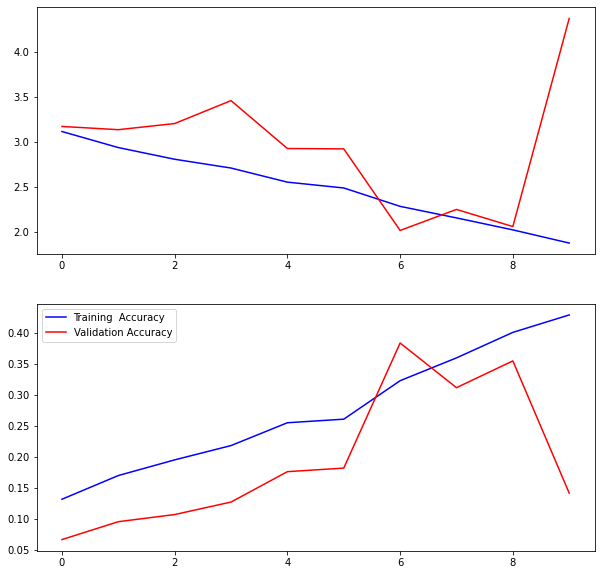

In [58]:
#Visualizo el entrenbamiento a traves de las epocas
f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Asignación de la primera graficacpara graficar la pérdida en el entrenamiento y en la  validación
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Trazado de la precisión del entrenamiento y la precisión de la validación
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [59]:
#Imprimo el accuracy de mi modelo
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.3843930661678314


In [60]:
#Obtengo medidas de prediccion del modelo
model_probs = model.predict(test_ds, verbose=0)
# Predecir clases para el conjunto de prueba
model_classes = np.argmax(model_probs,axis=1)
# Reducir a un array de 1D
model_probs = model_probs[:, 0]
 
# accuracy: (tp + tn) / (p + n) encuentro el accuracy del modelo
accuracy = accuracy_score(test_labels, model_classes)*100
# precision tp / (tp + fp) encuentro la precision del modelo
precision = precision_score(test_labels, model_classes, average='weighted')*100
# recall: tp / (tp + fn) analizo el recall del modelo
recall = recall_score(test_labels, model_classes, average='weighted')*100
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, model_classes, average='weighted')*100

#Imprimo los valores
print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)

Accuracy: 15.74
F1 score: 13.40
Precision: 25.77
Recall: 15.74


c:\Users\VINICIO BORJA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
#Hago una prediccion de mi modelo
pred = model.predict(test_ds)

pred.shape

(432, 25)

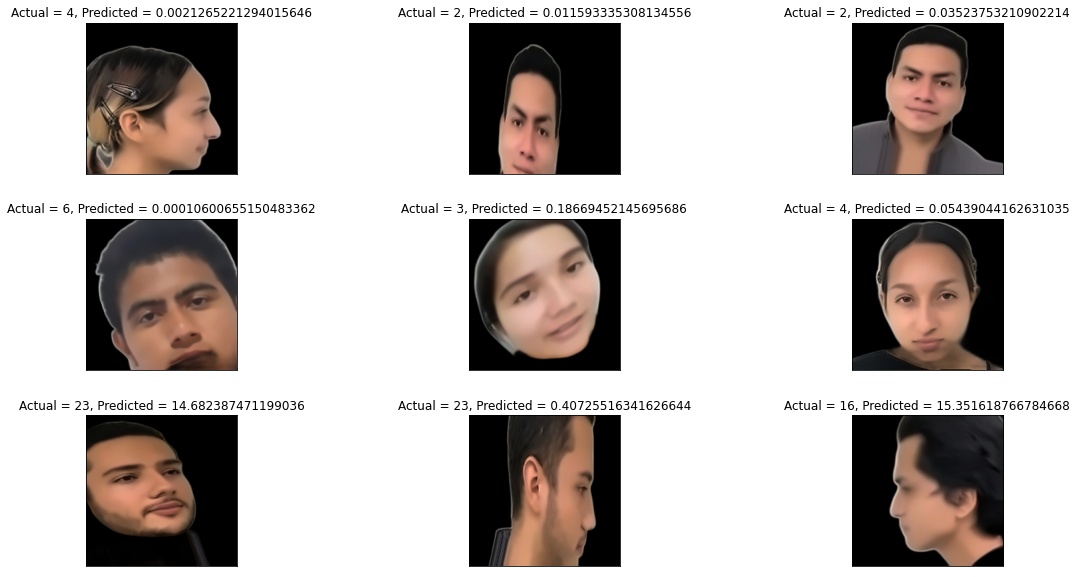

In [62]:
#Mestro de forma grafica como esta funcionando el modelo con su prediccion aproximada
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, test_ds.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(test_ds[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()